Análisis del Discriminante Lineal (LDA)
======================================

Es un método estadístico usado tanto para reducción de dimensionalidad como para clasificación. Es bastante parecido al PCA, pero en lugar de encontrar los componentes principales, busca los ejes que maximizan la separación entre clases.
El algoritmo es el siguiente:

1.- Se escalan los datos para que tengan media 0 y varianza 1.

2.- Se calculan $c$ vectores $m$-dimensionales que contenga las medias de cada clase $\mu_0 = \frac{1}{n_0} \Sigma x^i_1 ... \frac{1}{n_0} \Sigma x^i_m$, $\mu_1 = \frac{1}{n_1} \Sigma x^i_1 ... \frac{1}{n_1} \Sigma x^i_m$.

3.- Se calcula la matriz de productos cruzados entre las medias de cada clase $S_0 = \Sigma((x^i_1, ..., x^i_m) - \mu_0)((x^i_1, ..., x^i_m) - \mu_0)^T$, $S_1 = \Sigma((x^i_1, ..., x^i_m) - \mu_1)((x^i_1, ..., x^i_m) - \mu_1)^T$.

4.- Se calcula la matriz de covarianza normalizada de las matrices anteriores $W = \frac{1}{n_0}S_0 + \frac{1}{n_1}S_1$.

5.- Se calcula la matriz de covarianza global entre todas las clases $B = n_0(\mu_0 - \mu)(\mu_0 - \mu)^T + n_1(\mu_1 - \mu)(\mu_1 - \mu)^T$.

6.- Se calculan los valores y vectores propios de la matriz $W^{-1}B$.

7.- Se eligen los $k$ vectores propios más grandes como el número de dimensiones reducidas.

8.- Los $k$ vectores propios son los discriminantes lineales. El espacio $m$-dimensional se proyecta en un espacio $k$-dimensional.

<center>

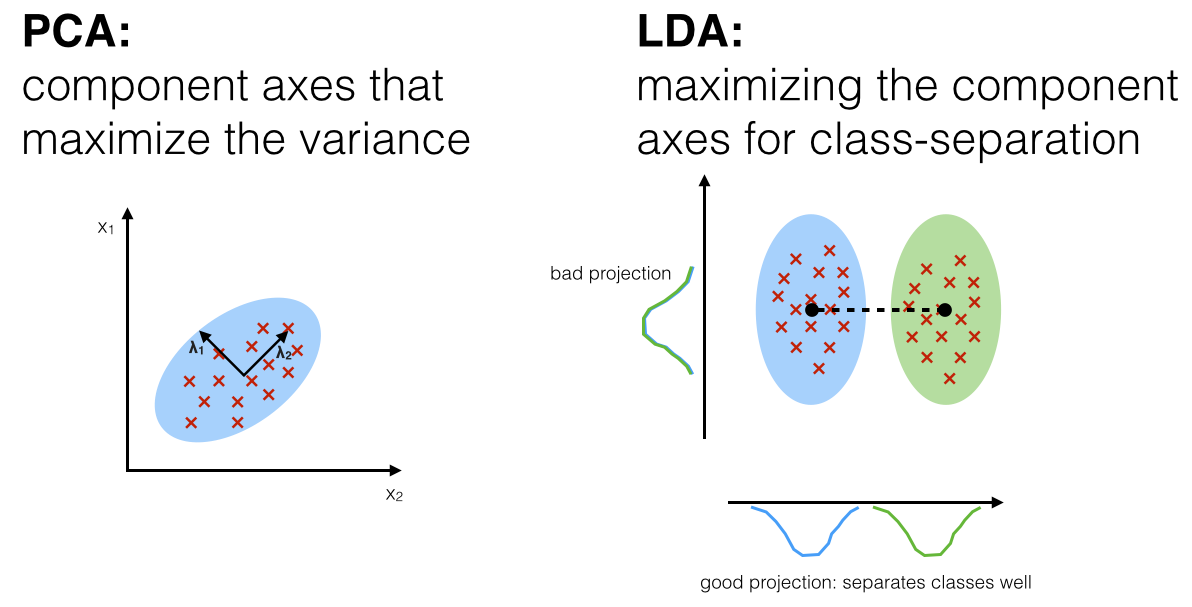

</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./datasets/Wine.csv')
X = dataset.iloc[:, 0 : 13].values
Y = dataset.iloc[:, 13].values

In [2]:
# Escalamos las variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = None)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

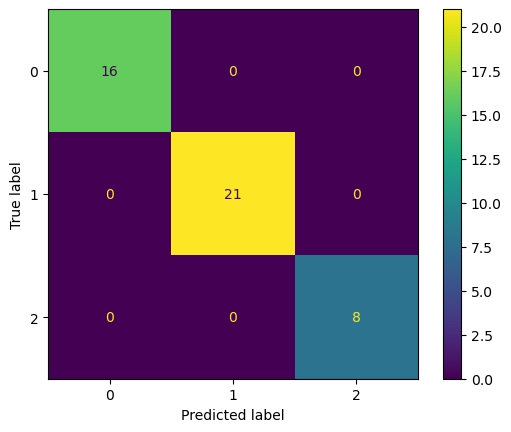

In [7]:
# Entrenamos el clasificador
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

# Predecimos los resultados con el conjunto de testing
Y_pred  = classifier.predict(X_test)

# Elaboramos una matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(cm).plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


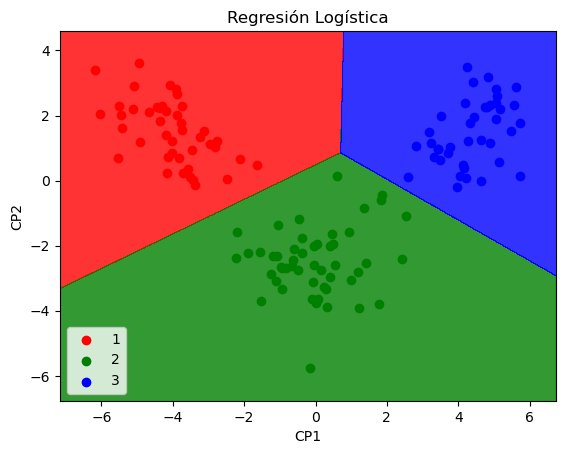

In [8]:
# Representación gráfica de los resultados del algoritmo en el conjunto de prueba
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.8, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Regresión Logística')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()

Referencias:

https://www.cienciadedatos.net/documentos/28_linear_discriminant_analysis_lda_y_quadratic_discriminant_analysis_qda